# Customer Churn Prediction

Step 1: Load Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Step 2: Load Dataset

In [140]:
data=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\project-1\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

Step 3: Data Preprocessing

In [141]:
# Check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [128]:
# Convert 'TotalCharges' to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [129]:
# Drop irrelevant columns
data.drop(['customerID'], axis=1, inplace=True)

In [130]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Step 4: Exploratory Data Analysis(EDA)

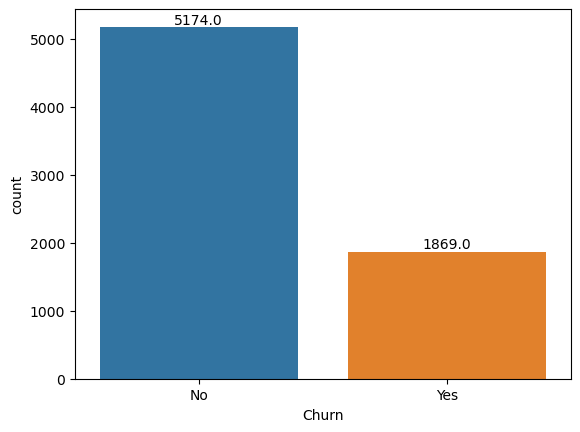

In [143]:
ax=sns.countplot(x='Churn',data=data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2, p.get_height())
                ,ha='center', va='bottom')
plt.show()

Text(0.5, 1.0, 'Churn by Gender')

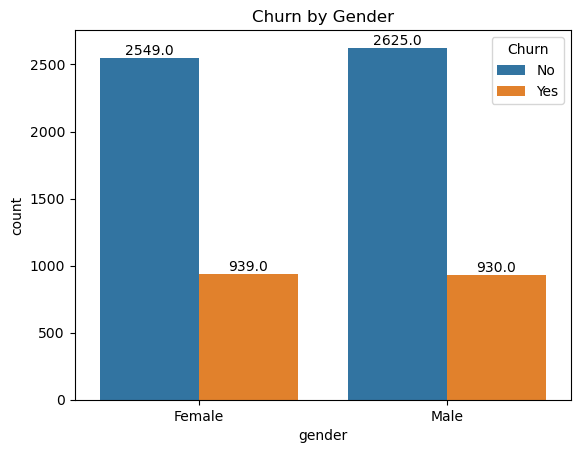

In [144]:
# Relationships between categorical variables and churn
ax=sns.countplot(x='gender', hue='Churn', data=data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2, p.get_height())
                ,ha='center', va='bottom')
plt.title("Churn by Gender")


Step 5: Feature Engineering

In [134]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    if data[col].nunique() == 2:  # Binary encoding
        data[col] = label_enc.fit_transform(data[col])
    else:
        data = pd.get_dummies(data, columns=[col], drop_first=True)


In [116]:
# Scale numerical columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols] = scaler.fit_transform(data[num_cols])

Step 6: Split Data

In [120]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 7: Train and Evaluate a Model

In [145]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [146]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[946  90]
 [201 172]]
ROC-AUC Score: 0.839364642313704


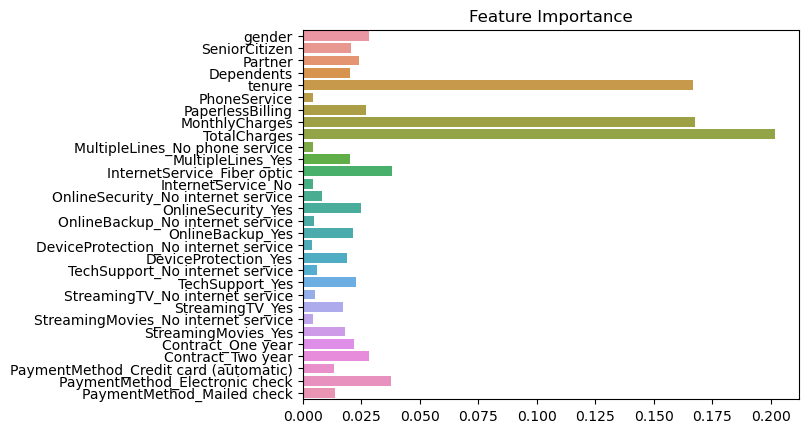

In [147]:
# Feature Importance
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()